###1a###


In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

bton = "Boston.csv"
df = pd.read_csv(bton)

df.head()

# df.isnull().sum()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Loading the Libraries

In [ ]:
X = df["rm"]
Y = df['medv']
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

print(X.shape)
print(Y.shape)

from sklearn.model_selection import train_test_split

# Holding out 20% data for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(506, 1)
(506, 1)
(404, 1)
(102, 1)
(404, 1)
(102, 1)


Training the data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_predict = lin_model.predict(X_train)
mse = (mean_squared_error(Y_train, y_predict))
# r2 = round(lin_model.score(X_train, Y_train),2)
print('Linear Training MSE is {}'.format(mse))

y_predict_2 = lin_model.predict(X_test)
mse = (mean_squared_error(Y_test, y_predict_2))
# r2 = round(lin_model.score(X_train, Y_train),2)
print('Linear Testing MSE is {}'.format(mse))

Linear Training MSE is 48.612648648611334
Linear Testing MSE is 23.970455527991305


Linear Regression MSE values calculation

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def Poly_MSE(n, bol = 0):
  poly = PolynomialFeatures(degree = n)
  X_poly_train = poly.fit_transform(X_train)
  X_poly_test = poly.fit_transform(X_test)

  poly_reg = LinearRegression()
  poly_reg.fit(X_poly_train, Y_train)


  y_predict = poly_reg.predict(X_poly_train)
  mse = (mean_squared_error(Y_train, y_predict))

  if(bol):  print('Poly({}) Training MSE is {}'.format(n,mse))

  y_predict_2 = poly_reg.predict(X_poly_test)
  mse_test = (mean_squared_error(Y_test, y_predict_2))

  if(bol): print('Poly({}) Testing MSE is {}'.format(n,mse_test))
  return(mse,mse_test)


Poly_MSE(1,1)
Poly_MSE(2,1)
Poly_MSE(3,1)
Poly_MSE(4,1)
Poly_MSE(5,1)
Poly_MSE(7,1)
Poly_MSE(10,1)
Poly_MSE(100,1)

Poly(1) Training MSE is 48.612648648611334
Poly(1) Testing MSE is 23.970455527991298
Poly(2) Training MSE is 42.427602706796975
Poly(2) Testing MSE is 21.2707188529886
Poly(3) Training MSE is 41.13965578201437
Poly(3) Testing MSE is 20.901128610738215
Poly(4) Training MSE is 39.396029456377335
Poly(4) Testing MSE is 23.591710006402327
Poly(5) Training MSE is 37.57529946512454
Poly(5) Testing MSE is 23.485187051953652
Poly(7) Training MSE is 37.45120273224176
Poly(7) Testing MSE is 23.751494582338886
Poly(10) Training MSE is 37.23076804389749
Poly(10) Testing MSE is 23.908976393224503
Poly(100) Training MSE is 60.912386144231455
Poly(100) Testing MSE is 76.80930436036542


(60.912386144231455, 76.80930436036542)

Polynomial Model MSE values with different degrees(n), along with a bool(bol) whether to print it or not.


We see that polynomial models to a certain  degree decreases the MSE for the data set. 
Later this reaches a minimum and starts overfitting data to increase the MSE again.

______
End_1a
_______


1b


Plot between MSE values for training data, testing data [Y axis] and the flexibility (1/degree) [X axis]

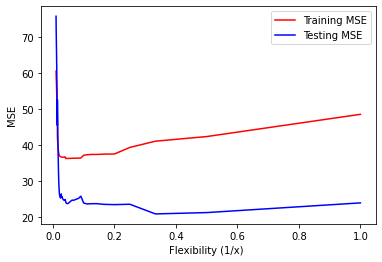

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
tr = []
test = []
deg = []
for i in range(1,100):
  tr.append(Poly_MSE(i)[0])
  test.append(Poly_MSE(i)[1])
  deg.append(1/i)

plt.plot(deg, tr, color='red', label = "Training MSE")
plt.plot(deg, test, color='blue', label = "Testing MSE")
plt.ylabel("MSE")
plt.xlabel("Flexibility (1/x) ")
plt.legend()

plt.show()

________
end_1b
_______

1c

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

def Loocv(n):
  looc = LeaveOneOut()
  poly = PolynomialFeatures(degree = n)
  X_poly =  poly.fit_transform(X)
  
  lm = LinearRegression()
  lm.fit(X_poly,Y)

  score = cross_val_score(lm, X_poly, Y, scoring='neg_mean_absolute_error',
                          cv=looc, n_jobs=-1)
  
  score = np.mean(np.absolute(score))
  print(score)

for i in range(1,10):
  Loocv(i)


4.4714109539599365
4.260496876399198
4.213183298137221
4.306460847227965
4.161192527903798
4.19994473296264
4.209895339530535
4.222309655417611
4.45829310552071


MSE scores decrease till degree 5 and start increasing from there.
Best MSE at Degree 5

____
1d
____


In [ ]:
from sklearn.model_selection import KFold

def kfold(n):
#build multiple linear regression model
  X = df["rm"]
  Y = df['medv']
  X = np.array(X).reshape(-1,1)
  Y = np.array(Y).reshape(-1,1)
  kfolds = KFold(n_splits=10, random_state = 1, shuffle = True)

  poly = PolynomialFeatures(degree = n)
  X_poly =  poly.fit_transform(X)
  
  reg = LinearRegression()
  reg = reg.fit(X_poly,Y)

#use k-fold CV to evaluate model
  scores = cross_val_score(reg, X_poly, Y, scoring='neg_mean_absolute_error',
                         cv=kfolds, n_jobs=-1)

#view mean absolute error
  print(np.mean(np.absolute(scores)))

for i in range(1,10):
  kfold(i)



4.471112683891881
4.254121863727749
4.209713055113044
4.279139209709468
4.1408159113040135
4.226391225527246
4.200711437477372
4.273159508768033
4.359089591156837


MSE scores decrease till degree 5 and start increasing from there.
Best MSE at Degree 5

_______

____
q2
____
# New Section

Data based on Three predictors: aver-
age number of rooms per house, average age of houses, and percent
of households with low socioeconomic status


Training the data and finding linear MSE

In [ ]:

X = pd.DataFrame(np.c_[df['lstat'], df['rm'], df['age']], columns = ['lstat','rm','age'])
Y = df['medv']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_predict = lin_model.predict(X_train)
mse = (mean_squared_error(Y_train, y_predict))
print('Linear Training MSE is {}'.format(mse))

y_predict_2 = lin_model.predict(X_test)
mse = (mean_squared_error(Y_test, y_predict_2))
print('Linear Testing MSE is {}'.format(mse))

Poly_MSE(1)
Poly_MSE(2,1)
Poly_MSE(3,1)
Poly_MSE(10,1)


(354, 3)
(152, 3)
(354,)
(152,)
Linear Training MSE is 27.99699225810804
Linear Testing MSE is 36.52832051219202
Poly(2) Training MSE is 17.029298303351986
Poly(2) Testing MSE is 20.786368141946525
Poly(3) Training MSE is 15.295650924461071
Poly(3) Testing MSE is 20.37162544348886
Poly(10) Training MSE is 5.5607680450371575
Poly(10) Testing MSE is 76427.83433377731


(5.5607680450371575, 76427.83433377731)

PLotting the data and printing the degree (-1 of value seen in array) of lowest MSE.


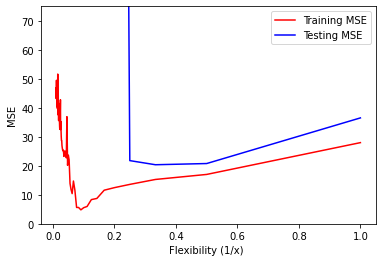

Poly(1) Training MSE is 27.996992258108044
Poly(1) Testing MSE is 36.52832051219205
Poly(2) Training MSE is 17.029298303351986
Poly(2) Testing MSE is 20.786368141946525
Poly(3) Training MSE is 15.295650924461071
Poly(3) Testing MSE is 20.37162544348886
Poly(4) Training MSE is 13.591899525926134
Poly(4) Testing MSE is 21.79466152287288
Poly(5) Training MSE is 12.471710340337962
Poly(5) Testing MSE is 802.2036620744717
Poly(6) Training MSE is 11.586514427628556
Poly(6) Testing MSE is 6618.8305351160025
Poly(7) Training MSE is 8.74728036783086
Poly(7) Testing MSE is 2100.2902580031114
Poly(8) Training MSE is 8.346442023929155
Poly(8) Testing MSE is 29949.102171652172
Poly(9) Training MSE is 5.981260409042133
Poly(9) Testing MSE is 33401.80275194347


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
tr = []
test = []
deg = []
for i in range(1,100):
  tr.append(Poly_MSE(i)[0])
  test.append(Poly_MSE(i)[1])
  deg.append(1/i)

plt.plot(deg, tr, color='red', label = "Training MSE")
plt.plot(deg, test, color='blue', label = "Testing MSE")
plt.ylabel("MSE")
plt.xlabel("Flexibility (1/x) ")
plt.ylim(0,75)
plt.legend()

plt.show()

#printing MSE values manually
for i in range(1,10):
  Poly_MSE(i,1)

In [ ]:
print(np.argsort(tr))
print(np.argsort(test))
#shows index values ( which is degree value - 1)

[10  9 11 12  8  7  6 15 13  5 16  4  3 17 14  2  1 20 18 22 27 19 26 23
 28 24 25 30 29 31 32 33  0 34 35 36 37 39 44 43 45 42 46 38 53 47 21 54
 52 49 60 48 55 41 56 67 65 59 69 70 51 68 58 71 50 73 74 40 78 94 66 61
 72 79 77 76 75 80 93 81 62 83 92 57 84 85 91 97 82 89 64 90 88 98 87 96
 95 86 63]
[ 2  1  3  0  4  6  5  7  8  9 10 11 12 20 30 26 29 19 21 43 28 31 22 41
 27 23 44 13 42 24 25 15 14 17 16 40 18 35 36 37 39 38 32 45 46 47 33 34
 48 49 50 51 91 52 53 92 54 93 83 95 61 59 94 60 97 84 72 55 71 57 56 96
 73 98 58 85 86 74 75 76 87 77 78 88 79 80 62 70 81 89 64 63 65 82 68 69
 67 66 90]


Training data reaches its most optimal when MSE is lowest. This occurs at degree 11.
For testing data this occurs at degree 3. 

---



____
2b
____
removing half the sample and re-running 2a

(177, 3)
(76, 3)
(177,)
(76,)
Linear Training MSE is 33.41939889779747
Linear Testing MSE is 30.28937733272516


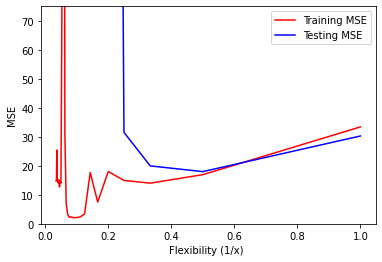

In [ ]:
df = df.sample(frac=.5)

X = pd.DataFrame(np.c_[df['lstat'], df['rm'], df['age']], columns = ['lstat','rm','age'])
Y = df['medv']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_predict = lin_model.predict(X_train)
mse = (mean_squared_error(Y_train, y_predict))
# r2 = round(lin_model.score(X_train, Y_train),2)
print('Linear Training MSE is {}'.format(mse))

y_predict_2 = lin_model.predict(X_test)
mse = (mean_squared_error(Y_test, y_predict_2))
# r2 = round(lin_model.score(X_train, Y_train),2)
print('Linear Testing MSE is {}'.format(mse))

import numpy as np
from matplotlib import pyplot as plt
tr = []
test = []
deg = []
# plt.rcParams["figure.autolayout"] = True
for i in range(1,30):
  tr.append(Poly_MSE(i)[0])
  test.append(Poly_MSE(i)[1])
  deg.append(1/i)

plt.plot(deg, tr, color='red', label = "Training MSE")
plt.plot(deg, test, color='blue', label = "Testing MSE")
plt.ylabel("MSE")
plt.xlabel("Flexibility (1/x) ")
plt.legend()
plt.ylim(0,75)

plt.show()


In [ ]:
print(np.argsort(tr))
print(np.argsort(test))
#shows index values ( which is degree value - 1)

[10  9 12  8 11 13  7 14  5 21 23  2 19 20 28 25 24 27  3 22  1  6  4 26
 15  0 18 17 16]
[ 1  2  0  3  4  5  6  7  8  9 13 21 10 20 24 22 26 23 25 27 11 12 15 28
 14 19 16 18 17]


Again
Training data reaches its most optimal when MSE is lowest. This occurs at degree 11.
For testing data this occurs at degree 3. 
note: this varies depending on split


____
2c
____
removing half the sample and re-running 2a

(44, 3)
(19, 3)
(44,)
(19,)
Linear Training MSE is 29.895798072746654
Linear Testing MSE is 7.5292168965174
[ 5  6  7  8  9  4 11 10 12 13 14 15  3  2 16 17 21 24 25 26 20  1 19 27
 28 23  0 18 22]
[ 0  1  2  3  5  4  6  7  8  9 10 11 13 12 15 14 24 20 16 23 25 21 26 17
 19 27 22 18 28]


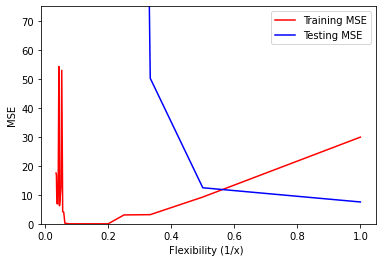

In [ ]:
df = df.sample(frac=.25)
X = pd.DataFrame(np.c_[df['lstat'], df['rm'], df['age']], columns = ['lstat','rm','age'])
Y = df['medv']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_predict = lin_model.predict(X_train)
mse = (mean_squared_error(Y_train, y_predict))
# r2 = round(lin_model.score(X_train, Y_train),2)
print('Linear Training MSE is {}'.format(mse))

y_predict_2 = lin_model.predict(X_test)
mse = (mean_squared_error(Y_test, y_predict_2))
# r2 = round(lin_model.score(X_train, Y_train),2)
print('Linear Testing MSE is {}'.format(mse))

import numpy as np
from matplotlib import pyplot as plt
tr = []
test = []
deg = []
# plt.rcParams["figure.autolayout"] = True
for i in range(1,30):
  tr.append(Poly_MSE(i)[0])
  test.append(Poly_MSE(i)[1])
  deg.append(1/i)

print(np.argsort(tr))
print(np.argsort(test))
#shows index values ( which is degree value - 1)

plt.plot(deg, tr, color='red', label = "Training MSE")
plt.plot(deg, test, color='blue', label = "Testing MSE")
plt.ylabel("MSE")
plt.xlabel("Flexibility (1/x) ")
plt.legend()
plt.ylim(0,75)

plt.show()


Again, for 1/4 data
Training data reaches its most optimal when MSE is lowest. This occurs at degree 6. For testing data this occurs at degree 2.
note: this varies depending on split